# Exercises

In [1]:
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)

# Exercise 1: What view of probability is more appropriate?

Decide whether you would rather use a frequentist or a Bayesian understanding of probability
to answer the following problems:

**a) A medical researcher wants to determine the exact rate of prostate cancer for males between 50 and 60 in Switzerland.**

To answer this we use the Frequentist understanding of probability because we want to predict a rate for a group of people - not a specific individual.

**b) A gambler goes into a casino and looks for the game with the highest probability of winning money.**

For this we want to use the Frequentist understanding of probability because we are interested in the likeliness of different outcomes of the repeatable games.

**c) A poker player wants to create a mathematical model that predicts the moves of his opponents. He knows the strategies of most of his opponents quite well.**

We need to use the Bayesian understanding of probability because we want to predict the moves of individual for which we already have some prior knowledge.

**d) A particle physicist has run an interesting experiment. Now she wants to assess whether the collected data puts the standard model of particle physics into question. From her education she knows that a long series of experiments have confirmed the standard model.**

Because we don't have a lot of data, we should use the Bayesian approach to figure out if the collected data might put the standard model of particle physics into question.

**e) An insurance company wants to estimate the number of car accidents per year in their portfolio to guess what reserves that they have to put aside.**

We use the Frequentist approach because we are interested in probabilities of historical events.

**f) An economist predicts inflation rates in different countries for next year.**

We should use Bayesian probability to do this estimation - because we can incorporate existing prior knowledge about the countries in question. Also, we can't run experiments to establish probability distribution.

**g) A doctor is asking himself whether you could have scabies.**

We use the Bayesian approach because we want to say something about an individual using existing beliefs of the doctor.

**h) An engineer is in charge of a production process producing thousands of special screws throughout a day. Her boss asks her to give an estimate of the rate of defective screws.**

We use the Frequentist approach using historical data to estimate the future likeliness of screws which are defective.

# Exercise 2: The law of large numbers
The law of large numbers states that a relative frequency will stabilize in the limit of large
numbers (respectively infnitely). Write a short numpy code that simulates N coin tosses and
computes the cumulative relative frequency at each subsequent coin toss. Visualize this cumulative relative frequency. Does your simulation stably reach 0.5 in the limit of large N? How
large does N approximately need to be to reach at least three zeros behind the 0.5? (or three
nines behind the 0.4)

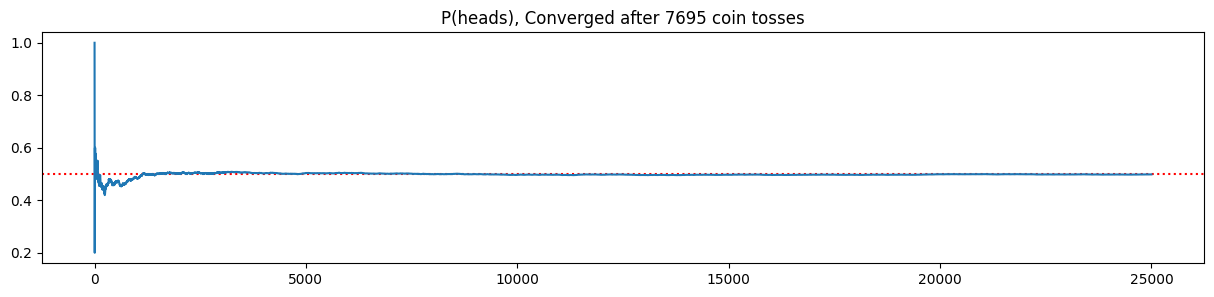

In [2]:
N = 25_000

heads = 0
converged_after_n = None
converged_lower_bound = 0.4999
converged_upper_bound = 0.5

cumulative_relative_frequencies = []

for i in range(N):
    toss = np.random.randint(2)

    if toss == 0:
        heads += 1

    p = heads / (i + 1)
    p_prev = 0

    if len(cumulative_relative_frequencies) > 0:
        p_prev = cumulative_relative_frequencies[-1]

    if converged_after_n is None and p <= converged_upper_bound and p >= converged_lower_bound and abs(p - p_prev) <= converged_upper_bound - converged_lower_bound:
        converged_after_n = i
    cumulative_relative_frequencies.append(p)

plt.title(f"P(heads), Converged after {converged_after_n} coin tosses")
plt.axhline(0.5, color='red', linestyle='dotted')
plt.plot(cumulative_relative_frequencies)

# Exercise 3: Binomially distributed random variables

A manufacturing company produces small pumps that go into ship motors. Your boss claims
that they have estimated the rate of defect pumps to be π = 5%. The company produces 20
pumps per day. To compute probabilities of different daily outcomes for the number of broken
pumps Y, you may use the binomial distribution:

$$
P(Y = k|\pi) = {n \choose k} \pi^{k} (1 - \pi)^{n-k}
$$

You may use Python to give your answers! (e.g. with scipy.stats.binom).

a) What is the probability that exactly 5% of the pumps are defective on a production day?
Try to compute your answer also in plain Python (using math.comb() for the binomial
coefficient).

$$
\pi = 0.05, \quad n = 20, \quad k = \pi \cdot n = 0.05 \cdot 20 = 1
$$

$$
\begin{align}
P(Y = 1 | 0.05) &= \binom{20}{1} \cdot 0.05^{1} \cdot (1-0.05)^{20-1} \\
&= \frac{20!}{1! (20-1)!} \cdot 0.05^{1} \cdot (1-0.05)^{20-1} \\
&= 20 \cdot 0.05 \cdot 0.95^{19} \\
&= 0.3774
\end{align}
$$

In [3]:
import math

n = 20
k = 1
p = 0.05

p1 = math.comb(n, k) * p ** k * (1 - p) ** (n - k)
p2 = stats.binom.pmf(k, n, p)

print(f"python: {p1}, scipy: {p2}")

python: 0.37735360253530725, scipy: 0.37735360253530764


b) Draw the probability mass function for the number of defective pumps per day with a
bar plot.

array([3.58485922e-01, 3.77353603e-01, 1.88676801e-01, 5.95821478e-02,
       1.33275857e-02, 2.24464601e-03, 2.95348159e-04, 3.10892799e-05,
       2.65895157e-06, 1.86593093e-07, 1.08027580e-08, 5.16878373e-10,
       2.04030937e-11, 6.60828945e-13, 1.73902354e-14, 3.66110219e-16,
       6.02154965e-18, 7.45702744e-20, 6.54125214e-22, 3.62396240e-24])

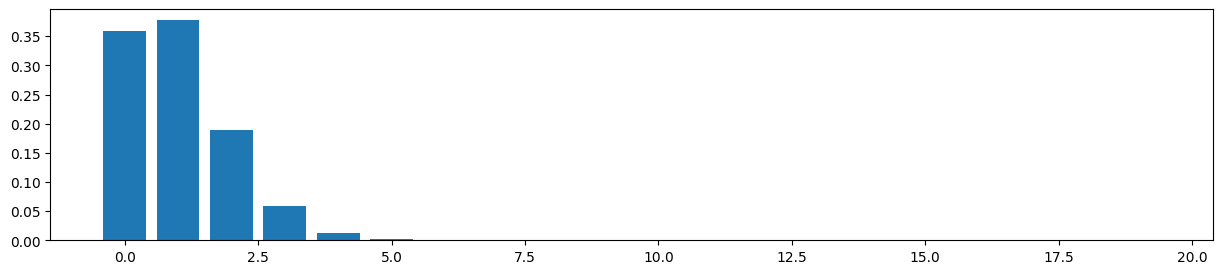

In [4]:
x = np.arange(0, 20)
pmf = stats.binom.pmf(x, n, p)
plt.bar(x, pmf)
pmf

c) What is the probability that more than 3 pumps are defective on a production day? Use
the cumulative distribution function (CDF).

P(defective <= 3) = 0.9840984739802364
P(defective > 3) = 0.01590152601976358


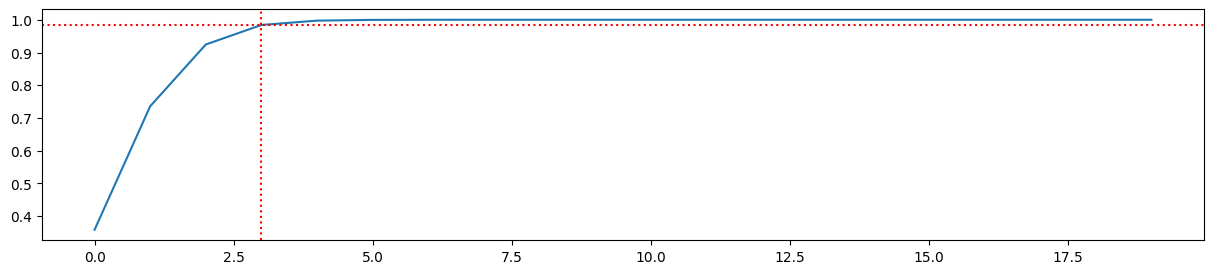

In [5]:
n = 20
k = 3
p = 0.05
x = np.arange(0, n)

p_k_or_less_defective = stats.binom.cdf(n = n, k = k, p = p)
p_more_than_k_defective = 1 - p_k_or_less_defective

print(f"P(defective <= {k}) = {p_k_or_less_defective}")
print(f"P(defective > {k}) = {p_more_than_k_defective}")

plt.plot(x, stats.binom.cdf(n = n, k = x, p = p))
plt.axvline(k, color='red', linestyle='dotted')
plt.axhline(1 - p_more_than_k_defective, color='red', linestyle='dotted')

ad) On one day, 10 pumps are defective. What is the probability for this event and what do you suspect happened?

In [6]:
n = 20
k = 10
p = 0.05

p_k_defective = stats.binom.pmf(k, n, p)
print(f"P(defective = {k}) = {p_k_defective}")

P(defective = 10) = 1.0802758002531833e-08


Probably the machine is broken!

# Exercise 4: Expectation of a PMF

Many count variables follow a Poisson distribution. The PMF of the Poisson distribution is:

$$
p(k) = P(X = k) = \frac{\lambda^{k} e^{-\lambda}}{k!},
$$

where k ∈ N (including 0) and λ ∈ R is a parameter. Show that the expectation of the Poisson distribution is λ.

**Hints:**

- Use $E[X] = \sum_{k=0}^{\infty} k p(k) = \sum_{k=1}^{\infty} k p(k)$
- and introduce $l = k - 1$ at an appropriate time.
- Finally, remember that $e^{\lambda} = \sum_{l=0}^{\infty} \frac{\lambda^{l}}{l!}$

$$
E[X] = \sum_{k=0}^{\infty} k \cdot p(k) = \sum_{k=1}^{\infty} k \cdot p(k)
$$

for $l = k - 1$, use $k = l +1$

$$
\begin{align}
E[X] &= \sum_{l=0}^{\infty} (l + 1) \cdot p(l + 1) \\
     &= \sum_{l=0}^{\infty} (l + 1) \cdot \frac{\lambda^{(l+1)} \cdot e^{-\lambda}}{(l+1)!} \\
     &= \sum_{l=0}^{\infty} \frac{(l + 1) \cdot \lambda^{(l+1)} \cdot e^{-\lambda}}{(l+1)!} \\
     &= \sum_{l=0}^{\infty} \frac{\lambda^{l+1} \cdot e^{-\lambda}}{l!} \\
     &= \sum_{l=0}^{\infty} \frac{\lambda^{l} \cdot \lambda \cdot e^{-\lambda}}{l!} \\
     &= \sum_{l=0}^{\infty} \frac{\lambda^{l}}{l!} \cdot \lambda \cdot e^{-\lambda}
\end{align}
$$

for $e^{\lambda} = \sum_{l=0}^{\infty} \frac{\lambda^{l}}{l!}$

$$
\begin{align}
E[X] &= e^{\lambda} \cdot \lambda \cdot e^{-\lambda} \\
     &= \lambda \cdot e^{\lambda - \lambda} \\
     &= \lambda \cdot 1 \\
     &= \lambda
\end{align}
$$

# TODO: Exercise 5: Maximum Likelihood Estimator

This exercise anticipates what we will be studying in next week's lecture and is a repetition of
the frequentist maximum likelihood principle. Let's consider the following problem: A coin has been tossed $n = 10$ times, out of which it
came up with heads $k = 8$ times. What is a likely value for the coin's probability of head $\pi$ ?

In your frequentist education, you have learnt that $\hat{\pi} = \frac{k}{n}$ is a good estimator. In fact, it is the
so-called maximum likelihood estimator for the binomial distribution that we want to derive in this exercise, in order
to be better able to distinguish between frequentist and Bayesian inference.

The probability to measure a particular outcome (number of heads) can be computed with the
binomial distribution:

$$
P(Y = k \mid \pi) = {n \choose k} \pi^{k} (1 - \pi)^{n-k}
$$

In the maximum likelihood method, we look for the value of π that is most likely to have
produced our observation. In other words, we are looking for the value of $\pi$ that yields the
maximum value for $P(Y = 8|\pi)$. To this end, one typically defines the _likelihood_ function

$$
L(\pi \mid Y = k) \equiv P(Y = k \mid \pi)
$$

in the domain of $\pi \in [0,1]$. Note that $L$ is not a probability distribution over $\pi$ (as it does not
integrate to 1), for this reason Sir Ronald Fisher called it likelihood, as he needed another word
than probability. In maximum likelihood, $L$ is maximized.

a) Use the first derivative by $\pi$ to show that the estimator $\hat{\pi} = \frac{k}{n}$ maximizes $L$ for a given $k$ and $n$:

$$
\frac{d}{d \pi} L(\pi \mid Y = k) \stackrel{!}{=} 0
$$

For simplicity, assume that $\pi \in (0,1)$, i.e. $\pi \notin \{0,1\}$.

b) Use Numpy and Matplotlib to plot $L(\pi|Y = 8)$ for different values of $\pi$ and verify that the maximum is at $\hat{\pi}$.

Hint: Use `scipy.stats.binom.pmf()` to compute $L(\pi|Y = 8)$.

# Exercise 6: Fighting Terrorism

You work for the Swiss government and are in discussions with a security contractor who offers
you a face detection software that could be installed at Zurich mainstation. The following are
its performance measures:

- Given that a person is registered as a terrorist, it finds them with a probability of 95%.
- Innocent citizens are only recognized as terrorists with a probability of 0.01%.

Would you buy their system and employ it?

> Zürich Hauptbahnhof (kurz Zürich HB, auch Zürcher Hauptbahnhof, bis 1893 Bahnhof Zürich) in Zürich ist der grösste Bahnhof der Schweiz. Er ist ein bedeutender Eisenbahnknoten für Züge aus dem In- und Ausland. Mit durchschnittlich 405'300 Fahrgästen an Werktagen (Stand: 2024)

Sources:
- https://de.wikipedia.org/wiki/Z%C3%BCrich_Hauptbahnhof
- https://reporting.sbb.ch/bahnhoefe?highlighted=9c366c8827f930ca4246e20299c13d28&years=1,4,5,6,7&scroll=2952.949951171875

In [7]:
passengers = 405_300
p_innocent = 0.0001

passengers_to_check = passengers * p_innocent
print(f"Falsely flagged passengers to check manually every day = {passengers_to_check}")

Falsely flagged passengers to check manually every day = 40.53


The system is not good enough; having to check at least 40 people every day is too much given the fact that in Switzerland is pretty much zero terrorism. This can severly harm the reputation of the Swiss government as well as the Zurich main station.

Don't buy.

# Exercise 7: Prison populations in Switzerland

In 2024, 70.1% of all prison inmates in Switzerland were not of Swiss nationality. One might
be inclined to conclude that the majority of Switzerland's inhabitants not holding the Swiss
passport are criminal. Using Bayes' theorem, show that this is not a correct interpretation and
needs to be put into perspective. In particular, use the the following additional numbers:

- There are 8.74 Million inhabitants in Switzerland.
- About 27% of these 8.74 Million inhabitants are not of Swiss nationality.
- About 6400 of these 8.74 Million inhabitants are currently in prison.

Given events $P$ (person is in prison) and $S$ (person is of Swiss nationality) compute, compare
and interpret the probabilities $P(P|S)$ and $P(P|\overline{S})$.

Given:

$$
\begin{align}
P(\overline{S}) &= 27\% \\
P(S) &= 100\% - P(\overline{S}) = 73\% \\
P(P) &= \frac{6400}{8,74 Mio} = \frac{32}{437}\% \approx 0.073\% \\
P(\overline{S} | P) &= 70.1\% \\
P(S|P) &= 100\% - P(\overline{S} | P) = 29.9\% \\
\end{align}
$$

Using Bayes' Theorem:

$$
\begin{align}
P(P|S) &= \frac{P(P) \cdot P(S|P)}{P(S)} = \frac{\frac{32}{437}\% \cdot 29.9\%}{73\%} = \frac{208}{6935}\% \approx 0.03\% \\
\\
P(P|\overline{S}) &= \frac{P(P) \cdot P(\overline{S}|P)}{P(\overline{S})} = \frac{\frac{32}{437}\% \cdot 70.1\%}{27\%} = 0.19002\%\\
\end{align}
$$

Interpretation:

Only about 0.2% of people _not_ holding the swiss passport are criminal. This is still a tiny amount.

# Exercise 8: Non-Invasive Prenatal Testing

Non-invasive prenatal testing (NIPT) is a blood test to determine the risk for a fetus to be born
with trisomy 21, 18 or 13. The test has to be conducted between week 5 and 7 of pregnancy and
is typically only applied when the first trimester screening (FTS - or Ersttrimestertest ETT in
German) is conspicuous.

In this exercise, we focus on NIPT's abilities to detect the presence of the down syndrome
(trisomy 21). The literature indicates a sensitivity of 99.2% and a specificity of 99.91% . The
prevalence of trisomy 21 depends on age: at age 20 it's around 0.1% or less, at age 40 it increases
significantly towards 1.4%.

You have just administered such a test and want to be prepared what it means to have a
positive or negative test result.

a) Given the events D: Down syndrome present and T: test result is positive, formulate
and compute the following probabilities of interest for a 40 year old woman:

1. that the Down syndrome is present given that the test turns out positive,
2. that the Down syndrome is present given that the test turns out negative,


In [8]:
from IPython.display import IFrame
IFrame("./Exercise-8a.pdf", width=600, height=750)

b) Answer the same questions for a 20 year old woman and explain the principal reason
behind why NIPT is typically not used on 20 year old women.

In [9]:
# When
pD = 0.001
pT_D = 0.992
pNotT_NotD = 0.9991
print(f"P(D) = {pD}")
print(f"P(T|D) = {pT_D}")
print(f"P(!T|!D) = {pNotT_NotD}")
print("-----------------------------------")

# Then
pNotD = 1. - pD
pNotT_D = 1. - pT_D
pT_NotD = 1. - pNotT_NotD
print(f"P(!D) = {pNotD}")
print(f"P(!T|D) = {pNotT_D}")
print(f"P(T|!D) = {pT_NotD}")
print("-----------------------------------")

# And
pT = pNotD * pT_NotD + pD * pT_D
pNotT = 1. - pT
print(f"P(T) = {pT}")
print(f"P(!T) = {pNotT}")
print("-----------------------------------")

pD_T = pD * pT_D / pT
pD_NotT = pD * pNotT_D / pNotT
print(f"P(D|T) = {pD_T}")
print(f"P(D|!T) = {pD_NotT}")

P(D) = 0.001
P(T|D) = 0.992
P(!T|!D) = 0.9991
-----------------------------------
P(!D) = 0.999
P(!T|D) = 0.008000000000000007
P(T|!D) = 0.0009000000000000119
-----------------------------------
P(T) = 0.0018911000000000119
P(!T) = 0.9981089
-----------------------------------
P(D|T) = 0.5245624239860366
P(D|!T) = 8.01515746428071e-06


The probability that the down syndrom is present in case the test turns out negative is only $52.46\%$. So there is a high chance that the test worries the gonna-be parents - but its still wrong.

c) Using the same argument as in b), argue that the probability that you actually have
Covid-19 given a positive Covid-19 self test was a time varying function between 2020-
2022. What causes the variability in time?

The chances to get infected increased dramatically during these two years. So the higher the risk of infection, the higher the probability that you'd actually have Covid-19 if the test signifies a positive result.

# Exercise 9: Magic Coin

You bought a magic coin from a wizard shop. Unfortunately, you have thrown away the
instruction manual and cannot remember whether the coin is biased towards heads or towards
tails. This is important, since you have to perform a magic trick in a few minutes. You call the
company and they tell you that the coin comes in two models:

- model 1 with $\pi = 0.2$ (probability to show heads is 20% in the long run) is sold in 10% of the cases
- model 2 with $\pi = 0.8$ is sold in 90% of the cases

a) You throw the coin 5 times and it shows heads twice. What model do you think it is with
your limited amount of data?

**Hint:** Compute the ratio of

$$
\frac{P(\pi = 0.8 | d)}{P(\pi = 0.2 | d)}
$$

where $d$ stands for your collected coin toss data, and use Bayes' theorem and the binomial distribution.

**Bayes theorem, the geometry of changing beliefs:**

- $P(H)$ := Probability that the **Hypothesis** is true
- $P(E)$ := Probability of the total **Evidence**

![Bayes Theorem 1](./Bayes-Theorem-1.png)

![Bayes Theorem 2](./Bayes-Theorem-2.png)

Given:

$$
\begin{align}
P(d) &= \frac{2}{5} = 0.4\\
P(M1) &= 0.1\\
P(M2) &= 0.9\\
\end{align}
$$

Then we can calculate for Model 1:

$$
\begin{align}
P(d | M1) &= {5 \choose 2} \cdot 0.2^2 \cdot (1-0.2)^{5-2} = \frac{5!}{2!(5-2)!} \cdot \frac{1}{25} \cdot \frac{64}{125} = 0.2048\\
P(M1 | d) &= \frac{P(M1) \cdot P(d | M1)}{P(d)} = \frac{0.1 \cdot 0.6144}{0.4} = 0.1536\\
\end{align}
$$

And similar for Model 2:

$$
\begin{align}
P(d | M2) &= {5 \choose 2} \cdot 0.8^2 \cdot (1-0.8)^{5-2} = 0.1536\\
P(M2 | d) &= \frac{P(M2) \cdot P(d | M2)}{P(d)} = \frac{0.9 \cdot 0.1536}{0.4} = 0.3456\\
\end{align}
$$

So we can conclude:

$$
\begin{align}
P(M2 | d) &> P(M1 | d)\\
0.3456 &> 0.1536
\end{align}
$$

Its $\frac{0.3456}{0.1536} = 2.25$ times more likely that we are using Model 2.

b) Luckily, your magic trick worked and the coin showed heads as you predicted. At home,
you have time for more ips. Interestingly, you ip the same ratio, just with ten times
higher numbers: Out of 50 ips, you get heads 20 times. How much do you believe now
that you have model 2?

In [10]:
n = 50.
k = 20.
pd = n/k

pM1 = 0.1
pM2 = 0.9

pH_M1 = 0.2
pH_M2 = 0.8

pd_M1 = stats.binom.pmf(k = k, n = n, p = pH_M1)
pd_M2 = stats.binom.pmf(k = k, n = n, p = pH_M2)
print(f"P(d|M1) = {pd_M1}")
print(f"P(d|M2) = {pd_M2}")

print("--------------------------")

pM1_d = pM1 * pd_M1 / pd
pM2_d = pM2 * pd_M2 / pd
print(f"P(M1|d) = {pM1_d}")
print(f"P(M2|d) = {pM2_d}")

print("--------------------------")
print(f"P(M1|d) > P(M2|d): {pM1_d / pM2_d} times smaller")

P(d|M1) = 0.0006117721516988407
P(d|M2) = 5.834313885677662e-10
--------------------------
P(M1|d) = 2.4470886067953626e-05
P(M2|d) = 2.1003529988439586e-10
--------------------------
P(M1|d) > P(M2|d): 116508.4444444457 times smaller


The probability that I do indeed have Model 2 is very low now. In fact, its $116'508$ times smaller than M1.

c) Argue why a frequentist magician would have failed at this task.

Because the frequentist magician cannot incorporate knowledge from outside the experiment. So they would only know that we tossed 2 times head out of 5 - and the tossing probabilities of the individual coins; but not how often they were sold (10% vs 90%).

d) Under what circumstance would you (the Bayesian magician) and the Frequentist magician have come to the same conclusion?
Hint: The frequentist cannot use the above ratio for decision making, but only
P(d|π= 0.8)
P(d|π= 0.2).
When are these two ratios the same?

If the same amount of both coins would have been sold.

# Exercise 10: Covid symptons

In 2021, the Israeli Ministry of Health has publicly released data of all individuals who were
tested for SARS-CoV-2 via PCR nasopharyngeal swab (see 'covid_tests.csv' in the exercise
material on Moodle). The dataset lists the result of the covid test and the symptoms of the test
subject. You are a data scientist (from 2021) and want to create a simple rule how individuals
are to be prioritized for a test according to their symptoms (anticipating a shortage of the
available covid tests).

a) Read the data from the CSV with pandas and perform the following additional actions:
- select only the columns 'corona_result' (result of the test) and the symptoms 'cough', 'fever', 'sore_throat', 'shortness_of_breath' and 'head_ache',
- filter out only 'positive' and 'negative' test results
- replace 'positive' test results with 1 and 'negative' with 0

In [11]:
df = pandas.read_csv('./covid_tests.csv', low_memory=False)

# select only the columns corona_result, cough, fever, sore_throat, shortness_of_breath and head_ache:
df = df[['corona_result','cough','sore_throat','shortness_of_breath','head_ache']]

# filter out only positive and negative test results:
df = df[(df['corona_result'] == 'positive') | (df['corona_result'] == 'negative')]

# replace positive with 1 and negative with 0:
df.loc[df['corona_result'] == 'positive', 'corona_result'] = 1
df.loc[df['corona_result'] == 'negative', 'corona_result'] = 0

df

,corona_result,cough,sore_throat,shortness_of_breath,head_ache
0,0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
278842,0,0.0,0.0,0.0,0.0
278843,0,0.0,0.0,0.0,0.0
278844,0,0.0,0.0,0.0,0.0
278845,1,0.0,0.0,0.0,0.0


b) Using the dataset, compute the conditional probabilities P(covid|cough) and P(cough|covid).

In [12]:
pCough = df.groupby('cough').mean()
pCovid = df.groupby('corona_result').mean()

print(str(pCough) + "\n")
print(str(pCovid) + "\n")

      corona_result  sore_throat  shortness_of_breath  head_ache
cough                                                           
0.0        0.034796     0.002840             0.002269   0.004088
1.0         0.15838     0.029492             0.024464   0.034303

                  cough  sore_throat  shortness_of_breath  head_ache
corona_result                                                       
0              0.134561     0.001406             0.001479   0.000569
1              0.448013     0.103612             0.079033   0.151752



pCoughc) Use your pandas skills to compute all values for P(symptom|covid) and P(covid|symptom).
Hint: P(symptom|covid) is easy to compute in a vectorized way using groupby(). The
inverse probability is more dicult to do in a vectorized way, but it works if you com-
pute the marginal probabilities (P(symptom),P(covid)) and multiply / divide them with
P(symptom|covid) according to Bayes' theorem.

In [13]:
pSympton_Covid = df[df.corona_result == 1].drop('corona_result', axis=1).mean()
pSympton_Covid

cough                  0.448013
sore_throat            0.103612
shortness_of_breath    0.079033
head_ache              0.151752
dtype: float64

In [14]:
pSymptom = df.drop('corona_result', axis=1).mean()
pSymptom

cough                  0.151330
sore_throat            0.006881
shortness_of_breath    0.005634
head_ache              0.008667
dtype: float64

In [15]:
pCovid = df.corona_result.mean()
pCovid

0.053568570971355416

In [16]:
pCovid_Symptom = pSympton_Covid * pCovid / pSymptom
pCovid_Symptom

cough                  0.158590
sore_throat            0.806606
shortness_of_breath    0.751501
head_ache              0.937954
dtype: float64

d) Which one would you rather use to prioritize individuals for covid tests, P(symptom|covid)
or P(covid|symptom) ? List the symptoms from highest to lowest priority and argue that
it makes a big dierence what conditional probability you use.

Of course we want to sort out the invidiuals with the highest risk of suffering from Covid-19 and are therefore interested in P(covid|symptom). The order of priority is, from highest to lowest:

1. head ache
2. sore throat
3. shortness of breath
4. fever
5. cough

The other probability P(symptom|covid) gives an almost inverted order and is not relevant for this problem!

# Exercise 11: Sick trees

This is an exercise borrowed from the book Bayes rules!

A local arboretum contains a variety of tree species, including elms, maples, and others. Unfortunately, 18% of all trees in the arboretum are infected with mold. Among the infected trees,
15% are elms, 80% are maples, and 5% are other species. Among the uninfected trees, 20%
are elms, 10% are maples, and 70% are other species. In monitoring the spread of mold, an
arboretum employee randomly selects a tree to test.

![Exercise 11 Probability Tree](Exercise-11.png)

a) What's the prior probability that the selected tree has mold?

18%

b) The tree happens to be a maple. What's the probability that the employee would have selected a maple?

$$
\begin{align}
P(Maple) &= P(Mold) * P(Maple | Mold) + P(NoMold) * P(Maple | NoMold)\\
         &= 0.18 * 0.8 + 0.82 * 0.1\\
         &= 0.226
\end{align}
$$

c) What's the posterior probability that the selected maple tree has mold?


$$
P(Mold | Maple) = \frac{P(Mold) \cdot P(Maple | Mold)}{P(Maple)} = \frac{18\% \cdot 80\%}{22.6\%} = 63.717\%
$$

d) Compare the prior and posterior probability of the tree having mold. How did your
understanding change in light of the fact that the tree is a maple?


Prior probability:

$$
P(Mold) = 18\%
$$

Posterior probability:

$$
P(Mold | Maple) = 63.717\%
$$

Knowing that it's a maple raised the prior probability of mold from 18% to 63.7%. This makes sense, as maples are over-represented in infected trees and under-represented in healthy trees.

e) There is another way to compute the posterior probability using a simulation! Proceed
in the following way:

1. Simulate 10'000 random trees and whether they have mold with np.random.choice()
according to the prior probability P(mold) and store your result in a data frame.
2. Assign a maple probability ($P(maple|mold)$ or $P(maple|\overline{mold})$) from the description
above to each tree according to whether the tree has mold or not.
3. For each tree, randomly sample whether it's a maple using np.random.choice()
and $P(maple|mold)$.
4. Compute P(mold|maple) by ltering out only maple trees and computing the ratio
of them that has mold.

How close is the simulated posterior probability to the one computed in d) with Bayes'
theorem? Take some time and ponder why this simulation works. In the literature, this
type of simulation is often called ancestral sampling, since it samples from two hierarchical
levels.

In [17]:
n = 10_000

pMold = 0.18
pMaple_Mold = 0.8
pMaple_NotMold = 0.1

df = pandas.DataFrame({ 'mold': np.random.choice([False, True], p = [1. - pMold, pMold], size = n) })

df['pMaple'] = df.mold.map({ False: pMaple_NotMold, True: pMaple_Mold })
df['maple'] = df.pMaple.apply(lambda pMaple : np.random.choice([False, True], p = [1. - pMaple, pMaple]))

df

,mold,pMaple,maple
0,False,0.1,False
1,True,0.8,False
2,False,0.1,False
3,False,0.1,False
4,False,0.1,False
...,...,...,...
9995,True,0.8,True
9996,True,0.8,True
9997,True,0.8,True
9998,False,0.1,False


In [18]:
pMold_Maple = df[df.maple == True].mold.mean()
pMold_Maple

0.6255545696539485

The simulated value is $64.29\%$ wherelse the calculated one using Bayes' Theorem is $63.72\%$. That said, the simulation is pretty accurate. It works because its the frequentist' way of calculating the probability - so it relies on the law of large numbers.